# Homework 3

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [32]:
# Codigo copiado de la clase.
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node
    def insert_head(self, new_node):
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null 
        new_node.set_next_node(self.head_node)
        self.head_node = new_node
    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null 
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

In [9]:
# Python Decorator
from time import time

#Python decorator
def dec_timer(passed_func):
    def wrap(*args, **kwargs): #Inner function
        t_init = time()*10**6 #Toma del tiempo inicial
        result = passed_func(*args, **kwargs) #Se ejecuta la fucion a evaluar su tiempo de ejecucion
        t_final = time()*10**6 #Toma el tiempo final
        t_total = (t_final-t_init)
        return (result, t_total) #Retorna el valor de la funcion de interes
    return wrap #Completa el decorador

In [33]:
def merge_nodes(node1, node2): # Se define una function auxiliar que recibe nodos 
                                # ya que no se puede realizar el merge directamente con las linked list
        if not node2: #Caso base 1. Si no existe node2, retorna node1. Es como hacer merge de un elemento con otro vacio
            return node1
        if not node1: #Caso base 2. Equivalente al anterior caso base.
            return node2
        if node1.val < node2.val: # Caso base 3. 
            node1.next_node = merge_nodes(node1.next_node, node2) # Si node1<node2 seteo el node1.next_node de acuerdo al orden que me retorne la llamada recursiva
            return node1 #Retorno node1 tal que: node1 -> ... -> ...
        else:
            node2.next_node = merge_nodes(node1, node2.next_node) # Equivalente al anterior.
            return node2 #Retorno node2 tal que: node2 -> ... -> ...
def merge_linked_lists(llist1, llist2):
    newllist = Singly_linked_list(merge_nodes(llist1.head_node, llist2.head_node)) #Devuelvo la linked list seteando el nodo cabeza 
    return newllist

In [34]:
#Creando la primera linked list
node11 = Node(1)
node12 = Node(2)
node13 = Node(5)
node14 = Node(7)

node11.set_next_node(node12)
node12.set_next_node(node13)
node13.set_next_node(node14)

ll1 = Singly_linked_list(node11)
print('First linked list')
ll1.list_traversed()

#Creando la segunda linked list
node21 = Node(2)
node22 = Node(4)
node23 = Node(6)

node21.set_next_node(node22)
node22.set_next_node(node23)

ll2 = Singly_linked_list(node21)
print('Second linked list')
ll2.list_traversed()


First linked list
1
2
5
7
Second linked list
2
4
6


In [35]:
# Merging the las anteriores linked lists
newll = merge_linked_lists(ll1, ll2)
print('Merged linked list')
newll.list_traversed()

Merged linked list
1
2
2
4
5
6
7


2.1. Complejidad merge_linked_lists()\
La complejidad por cada llamada recursiva de merge_nodes() (que es la que en realidad hace la mayoria de trabajo en el algoritmo) es $O(s)=O(1)$ ya que solo se estan comparando un par de nodos, uno de cada linked lists previamente ordenadas. Ahora, el numero de comparaciones de los pares de nodos (equivalente a decir llamadas recursivas) dependera del tamaño de las linked lists y siempre se realizara la operacion para todos los nodos; por lo tanto, $R=N+M$ donde N y M son representan la cantidad de nodos de cada linked list.\
En si, la complejidad de merge_linked_lists() es $O(N+M)$ y si $N\rightarrow\infty$ y $M\rightarrow\infty$ tal que $N+M=n$, finalmente, la complejidad es $O(n)$

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [27]:
@dec_timer
def quick_sort(arr):
    lower = [] # arreglo para almacenar los valores inferiores al pivote
    higher = [] # arreglo para almacenar los valores mayores al pivote
    if arr: # Evalua si hay elementos en el array
        pivot = arr[0] # Selecciono un pivote arbitrario, en este caso, el primer elemento de arr
        for i in arr[1:]: # Itero desde el elemento 1 de arr en adelante
            if i <= pivot: # En caso de que exista un elemento igual al pivote tambien consideramos el caso i==pivot.
                lower.append(i) # Agrega a lower los elementos menores al pivote
            elif i > pivot:
                higher.append(i) # Agrega a higher los elementos mayores al pivote
        return quick_sort(lower)[0]+[pivot]+quick_sort(higher)[0] # concatena en orden. LLamada recursiva
    else:
        return arr # Retorna arr si ya esta vacia
    

In [37]:
# Testeando quick_sort() anteriormente implementada
arr = [1, 4, 2, 7, 9, 3, 7, 8, 2, 21]
arr_sorted = quick_sort(arr)[0]
print(arr_sorted)

[1, 2, 2, 3, 4, 7, 7, 8, 9, 21]


2. Quick sort es un algoritmo clasico de divide and conquer. La manera en la que funciona es seleccionar un elemento de la permutacion como un pivote y, a partir de ello dividir la permutacion en dos sublistas: una donde se encuentren todos los valores menores al pivote y, en la otra, todos los valores mayores al pivote. Este proceso se repite hasta que solo quede el pivote y un elemento sea inferior o superior, en ese momento se comienza a combinar las sublistas ordenadas con los pivotes.\
En la anterior explicacion hay puntos y palabras clave que dan pistas de donde sucede divide, conquer y combine. La division (divide) se da al momento de escoger el pivote y almacenar los valores inferiores y mayores en dos sublistas. Este proceso continua hasta llegar al caso base: solo se tiene una sublista (inferior o superior) con un elemento con el cual realizamos la ultima comparacion y la otra sublista esta vacia. Esto vendria a ser la conquista (conquer). Finalmente, con la ultima comparacion realizada empezamos a concatenar los pivotes y las sublistas, tal que: lower_array+[pivot]+higher_array. Asi, se resuelven todas las llamadas recursivas; esta es la combinacion (combine).

3. Complejidad de Quick Sort\
Quick Sort funciona de una manera similar a Merge Sort, por lo que sus complejidades deberian ser similares tambien.\
En Quick sort, por cada llamada recursiva se escoge un pivote y se itera en una sublista realizando comparaciones, por tanto, $O(s)=n$. Ahora, dado que la permutacion original se esta dividiendo en 2 constantemente (hasta llegar al caso base) aquello podria entenderse como los niveles de su arbol de recursion, por lo tanto, $R=log(n)$ como se estudio en clases.\
En general, la complejidad de quick sort seria $O(nlog(n))$.\
Sin embargo, a diferencia de merge sort (cuyo peor caso igual seguia siendo $O(nlog(n))$), quick sort tiene una complejidad distinta cuando se nos presenta el peor de los casos. Si consideramos una lista ya ordenada, a la hora de realizar las llamadas recursivas e iterar para conseguir las sublistas, solo obtendremos valores en higher de tamaño n-1, n-2, n-3, ..., en otras palabras estaremos iterando en la lista dos veces. Por tanto, en el peor de los casos la complejidad de quick sort es $O(n^2)$.

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [40]:
import random

#Las siguientes dos funciones permiten generar una permutacion de numeros del 1 a n.
def get_rand_num(v) :
    n = len(v)
    ind = random.randint(0, n - 1) # indice aleatorio. Importante para obtener la permutacion aleatoria
    num = v[ind]
    # Remueve el numero de la lista
    v[ind], v[n - 1] = v[n - 1], v[ind]
    v.pop()
    # Retorna el numero popeado.
    return num
 
def generateRandomArr(n) :
    perm = [] 
    v = []
    for i in range(n) :
        v.append(i+1) # Agrega los valores de 1 a n en orden
 
    while (len(v)) :
        perm.append(get_rand_num(v)) # Con la lista v ordenada se crea la permutacion aleatoria
    return perm

In [41]:
#Codigo de clases
def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1
    
    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])
    
    return sorted_list

@dec_timer # Se aumenta el decorador para medir el tiempo
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])[0]
    right = merge_sort(nums[pivot:])[0]
    return merge(left, right)

In [45]:
# Obtencion de los tiempos utilizando quick sort y merge sort.
quick_sort_times = []
merge_sort_times = []
n = range(10000)
for i in n:
    rand_perm = generateRandomArr(i)
    quick_sort_times.append(quick_sort(rand_perm)[1])
    merge_sort_times.append(merge_sort(rand_perm)[1])

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

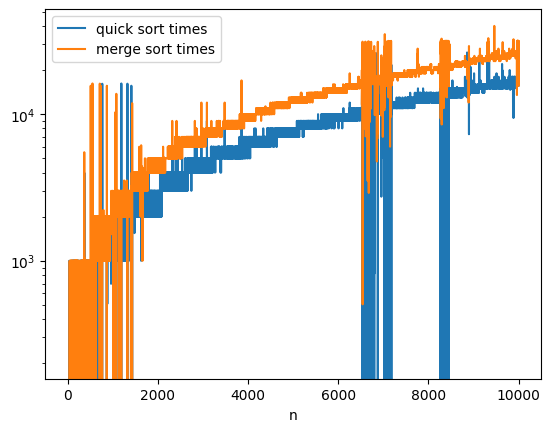

In [46]:
# Graficacion de los tiempos tomados para los algoritmos quick sort y merge sort.
df_sorting_times = pd.DataFrame()
df_sorting_times['n'] = n
df_sorting_times['quick sort times'] = quick_sort_times
df_sorting_times['merge sort times'] = merge_sort_times

df_sorting_times.plot(x='n', logy=True)
plt.xlabel('n')
plt.show()

4. A pesar de que la grafica no representa logaritmos perfectos, es notable que sigue dicha tendencia. Segun este plot de los tiempos de ejecucion, por lo general, elegir quick sort es una mejor opcion antes que merge sort ya que le toma menos tiempo ordenar una permutacion conforme esta aumenta su tamaño. Es verdad que cuando la lista ya esta ordenada, quick sort tiene una complejidad mayor a merge sort, sin embargo, realmente es ilogico ordenar algo ya ordenado, entonces mantendria esta preferencia por quick sort antes que merge.

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


In [5]:
#1
@dec_timer
def factorial(k):
    if k == 0: # Por definicion matematica 0! = 1. Seria el caso base.
        return 1
    else:
        return k*factorial(k-1) # Por definicion recursiva del factorial k! = k*(k-1)!

In [15]:
#2
nums = [100, 200, 300, 500, 600, 750, 900, 950] # Kernel dies with integers >980
fact_times = []
for i in nums:
    fact_times.append(factorial(i)[1]) # Obteniendo los tiempos usando la funcion factorial(k)


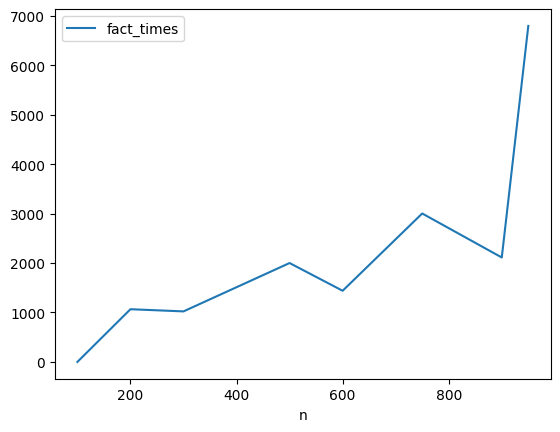

In [16]:
# 3 Graficacion de los tiempos de la funcion factorial(k)
df_fact_times = pd.DataFrame()
df_fact_times['n'] = nums
df_fact_times['fact_times'] = fact_times

df_fact_times.plot(x='n')
plt.xlabel('n')
plt.show()

Considerar que el grafico no es para nada bueno, esto debido a mi ordenador que tiene preestablecido el numero maximo de iteraciones como 1000. Aun asi, se podria decir que tiene cierta tendencia lineal.

4. En cada llamada recursiva solo se evalua si se llego al caso base, caso contrario realiza una nueva llamada, entonces $O(s)=O(1)$. El numero de llamadas recursivas es $R=n$ porque en cada llamada se decrementa el valor de k en 1 hasta llegar al caso base que es 0. Entonces la complejidad de la funcion es $O(n)$

In [23]:
#5 Memoization Factorial
prev_fact = {} # Los factoriales calculados se almacenan en este diccionario
@dec_timer
def mfactorial(k):
    if k == 0: # Caso base. Igual que en factorial(k)
        return 1
    if k in prev_fact: # Evalua si el factorial de k ya se calculo previamente en anteriores corridas de codigo
        return prev_fact[k] # Retorna el valor almacenado del factorial
    else: # En caso de no haberse ejecutado el factorial de k en corridas previas de codigo.
        prev_fact[k] = k*mfactorial(k-1) # Se guarda en el diccionario los factoriales. Si se ejecuta memo_factorial(20) entonces
                                             # se guardan: 1!, 2!, 3!, 4!, ..., 19!, 20!
        return prev_fact[k] # Retorna el valor de memo_factorial(k) solicitado.
    
    #Ejercicio hecho en colaboracion con Josue Endara

In [24]:
#Obteniendo los tiempos de la funcion mfactorial(k)
mem_nums = range(1, 10000, 10)
mem_fact_times = []
for i in mem_nums:
    mem_fact_times.append(mfactorial(i)[1])

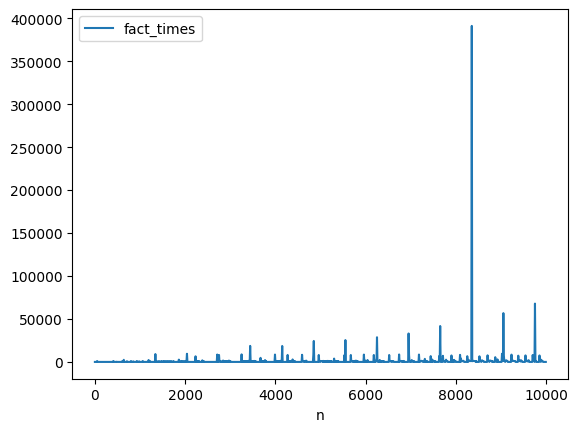

In [25]:
#6
#  Graficacion de los tiempos de mfactorial(k)
df_memfact_times = pd.DataFrame()
df_memfact_times['n'] = mem_nums
df_memfact_times['fact_times'] = mem_fact_times

df_memfact_times.plot(x='n')
plt.xlabel('n')
plt.show()

7. Por la implementacion del algoritmo es evidente que para que realmente exista una mejora de tiempo, se debe correr el algoritmo varias veces. Es decir, si la primera vez que corro $mfactorial(k)$ con $k=5000$, el algoritmo hara las 50000 llamadas recursivas ya que no hay datos almacenados en el diccionario (la clave de la memorizacion). Luego de ello, si hacemos $mfactorial(k=5)$ pues esto sera $O(1)$ porque el factorial de 5 si esta almacenado en el diccionario. Esto se cumple para todos los valores inferiores o iguales a 5000 (para el presente ejemplo).\
Ahora, si ejecutamos $mfactorial(k=5050)$ el algoritmo solo realizara llamadas recursivas hasta llegar a 5000 ya que 5000! esta almacenado en el diccionario.\
Por esta explicacion y por lo observado en el grafico de los tiempos, se puede decir que la complejidad tiende a ser $O(1)$

8. Considerando la explicacion brindada en el literal anterior, pues la diferencia es clara. Mientras que el algoritmo para calcular el factorial sin memorizacion realiza todas las multiplicaciones tal que $k*(k-1)*(k-2)*...*1$ SIEMPRE; el algoritmo que usa memorizacion aprovecha los resultados previamente conocidos para evitarse recalcular las multiplicaciones, es decir, si se conoce $m!$ (esta almacenado en el diccionario) y queremos calcular $k!$ tal que $m<k$ entonces el algoritmo calculara: $k*(k-1)*(k-2)*...*m!$ que computacionalmente resulta menos costoso, evidentemente.